# Which model is better on future data?

In [1]:
import numpy as np
import pandas as pd

import numpy.random as rnd
from pandas import DataFrame
from plotnine import *

## I. Simulated performance evaluation

For simplicitly, let us consider two models A and B that return correct class labels with probability 75% and 85%.
Then the exact content of the future data is irrelevant and we can compute the number of correct labels using binomial distribution. Hence, we can reduce data merely to its size during the simulation. 

In [2]:
def generate_data(size: int):
    return size

def evaluate_model_a(size: int):
    return rnd.binomial(size, 0.75)/size

def evaluate_model_b(size: int):
    return rnd.binomial(size, 0.85)/size

## II. Concrete experiments

To see which method is better we generate 1000 possible futures and tabulate the accuracy of both methods on each dataset. After that we visualise the results.  

In [3]:
accuracy = DataFrame(np.nan, index=range(1000), columns=['A', 'B'])

In [4]:
for i in range(1000):
    data = generate_data(100)
    accuracy.loc[i, 'A'] = evaluate_model_a(data)
    accuracy.loc[i, 'B'] = evaluate_model_b(data)

In [5]:
accuracy['status'] = 'Roughly equal'
accuracy.loc[accuracy['A'] < 0.9 * accuracy['B'], 'status'] = 'B wins' 
accuracy.loc[accuracy['B'] < 0.9 * accuracy['A'], 'status'] = 'A wins'
accuracy['status'] = pd.Categorical(accuracy['status'], ordered=True, categories=['B wins', 'Roughly equal', 'A wins'])

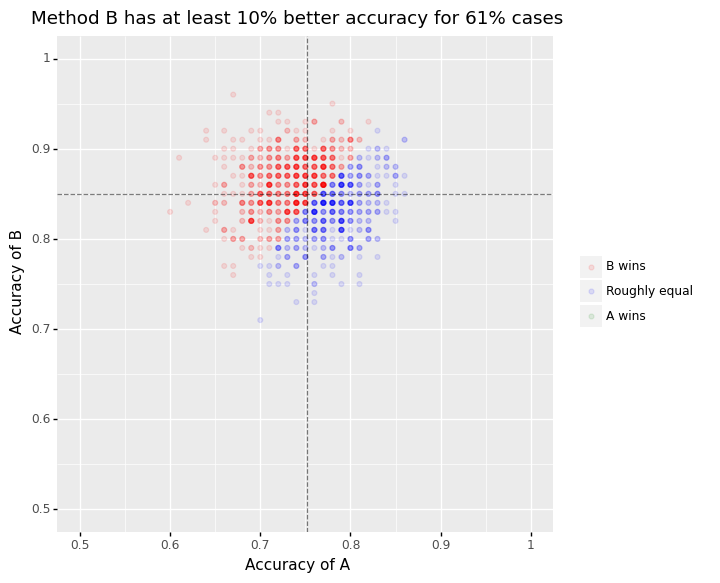

<ggplot: (381948606)>

In [6]:
b_win = np.mean(accuracy["status"] == 'B wins') * 100

p  = ggplot(accuracy) + geom_point(aes(x='A', y='B', color = 'status'), alpha=0.1)
p += ggtitle(f'Method B has at least 10% better accuracy for {round(b_win):.0f}% cases')
p += geom_hline(yintercept=np.mean(accuracy['B']), color='black', linetype='dashed', alpha=0.5 )
p += geom_vline(xintercept=np.mean(accuracy['A']), color='black', linetype='dashed', alpha=0.5 )
p += scale_x_continuous(name='Accuracy of A', limits=(0.5, 1))
p += scale_y_continuous(name='Accuracy of B', limits=(0.5, 1))
p += scale_color_manual(name=' ', values = ['red', 'blue', 'green'] ) 
p += coord_fixed(1) 
display(p)
p.save('accuracy_challenge_100.pdf', verbose=False)


In [7]:
for i in range(1000):
    data = generate_data(1000)
    accuracy.loc[i, 'A'] = evaluate_model_a(data)
    accuracy.loc[i, 'B'] = evaluate_model_b(data)

In [8]:
accuracy['status'] = 'Roughly equal'
accuracy.loc[accuracy['A'] < 0.9 * accuracy['B'], 'status'] = 'B wins' 
accuracy.loc[accuracy['B'] < 0.9 * accuracy['A'], 'status'] = 'A wins'
accuracy['status'] = pd.Categorical(accuracy['status'], ordered=True, categories=['B wins', 'Roughly equal', 'A wins'])

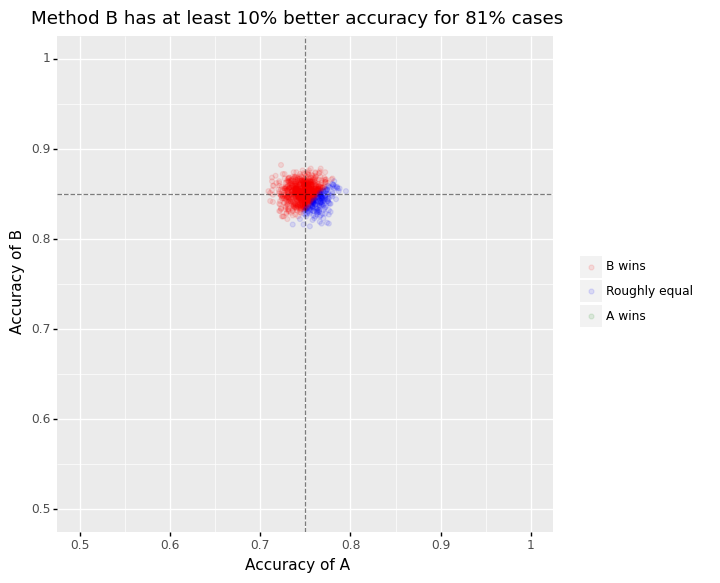

<ggplot: (382107558)>

In [9]:
b_win = np.mean(accuracy["status"] == 'B wins') * 100

p  = ggplot(accuracy) + geom_point(aes(x='A', y='B', color = 'status'), alpha=0.1)
p += ggtitle(f'Method B has at least 10% better accuracy for {round(b_win):.0f}% cases')
p += geom_hline(yintercept=np.mean(accuracy['B']), color='black', linetype='dashed', alpha=0.5 )
p += geom_vline(xintercept=np.mean(accuracy['A']), color='black', linetype='dashed', alpha=0.5 )
p += scale_x_continuous(name='Accuracy of A', limits=(0.5, 1))
p += scale_y_continuous(name='Accuracy of B', limits=(0.5, 1))
p += scale_color_manual(name=' ', values = ['red', 'blue', 'green'] ) 
p += coord_fixed(1) 
display(p)
p.save('accuracy_challenge_1000.pdf', verbose=False)

In [10]:
for i in range(1000):
    data = generate_data(10000)
    accuracy.loc[i, 'A'] = evaluate_model_a(data)
    accuracy.loc[i, 'B'] = evaluate_model_b(data)

In [11]:
accuracy['status'] = 'Roughly equal'
accuracy.loc[accuracy['A'] < 0.9 * accuracy['B'], 'status'] = 'B wins' 
accuracy.loc[accuracy['B'] < 0.9 * accuracy['A'], 'status'] = 'A wins'
accuracy['status'] = pd.Categorical(accuracy['status'], ordered=True, categories=['B wins', 'Roughly equal', 'A wins'])

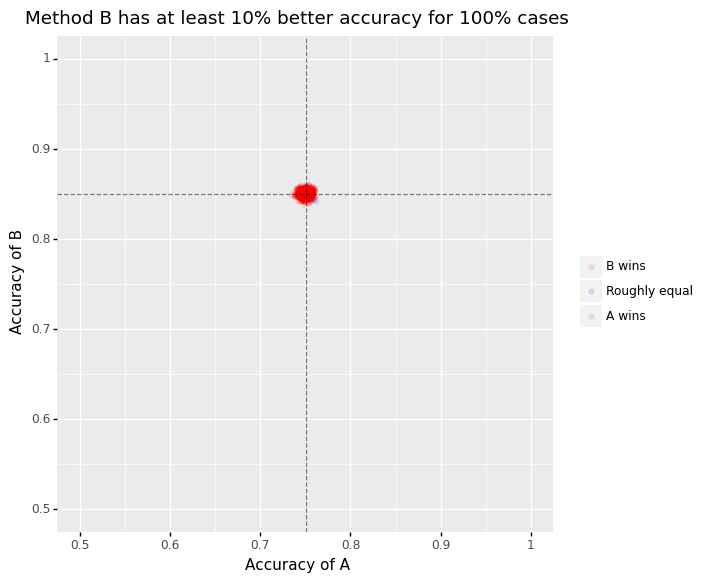

<ggplot: (382313942)>

In [12]:
b_win = np.mean(accuracy["status"] == 'B wins') * 100

p  = ggplot(accuracy) + geom_point(aes(x='A', y='B', color = 'status'), alpha=0.1)
p += ggtitle(f'Method B has at least 10% better accuracy for {round(b_win):.0f}% cases')
p += geom_hline(yintercept=np.mean(accuracy['B']), color='black', linetype='dashed', alpha=0.5 )
p += geom_vline(xintercept=np.mean(accuracy['A']), color='black', linetype='dashed', alpha=0.5 )
p += scale_x_continuous(name='Accuracy of A', limits=(0.5, 1))
p += scale_y_continuous(name='Accuracy of B', limits=(0.5, 1))
p += scale_color_manual(name=' ', values = ['red', 'blue', 'green'] ) 
p += coord_fixed(1) 
display(p)
p.save('accuracy_challenge_10000.pdf', verbose=False)
